In [55]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import LabelEncoder, StandardScaler

In [56]:
data = pd.read_csv("train.csv")

In [57]:
data.sample(15)

,traveller_ID,ticket_class,name,sex,age,Siblings_spouses,Parchil,TickNum,fare,cabin,embarked,MedBoat,Survived
210,84,1,"Cumings, Mr. John Bradley",male,39.0,1,0,PC 17599,71.2833,C85,C,NaN,0
247,460,2,"Jacobsohn, Mrs. Sidney Samuel (Amy Frances Chr...",female,24.0,2,1,243847,27.0000,NaN,S,12,1
641,127,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,D,1
194,1010,3,"McNamee, Mr. Neal",male,24.0,1,0,376566,16.1000,NaN,S,NaN,0
457,426,2,"Hale, Mr. Reginald",male,30.0,0,0,250653,13.0000,NaN,S,NaN,0
328,943,3,"Laitinen, Miss. Kristina Sofia",female,37.0,0,0,4135,9.5875,NaN,S,NaN,0
702,1300,3,"Yasbeck, Mrs. Antoni (Selini Alexander)",female,15.0,1,0,2659,14.4542,NaN,C,NaN,1
156,204,1,"Meyer, Mrs. Edgar Joseph (Leila Saks)",female,NaN,1,0,PC 17604,82.1708,NaN,C,6,1
895,276,1,"Spencer, Mr. William Augustus",male,57.0,1,0,PC 17569,146.5208,B78,C,NaN,0
60,486,2,"Leyson, Mr. Robert William Norman",male,24.0,0,0,C.A. 29566,10.5000,NaN,S,NaN,0


In [58]:
data.describe()

,traveller_ID,ticket_class,age,Siblings_spouses,Parchil,fare,Survived
count,916.000000,916.000000,729.000000,916.000000,916.000000,915.000000,916.000000
mean,656.248908,2.305677,29.102309,0.539301,0.386463,33.709221,0.361354
std,381.176191,0.841811,13.866954,1.082188,0.893933,52.840656,0.480655
min,0.000000,1.000000,0.166700,0.000000,0.000000,0.000000,0.000000
25%,328.250000,2.000000,21.000000,0.000000,0.000000,7.925000,0.000000
50%,670.000000,3.000000,28.000000,0.000000,0.000000,14.500000,0.000000
75%,974.250000,3.000000,37.000000,1.000000,0.000000,31.275000,1.000000
max,1308.000000,3.000000,80.000000,8.000000,9.000000,512.329200,1.000000


In [59]:
data.columns

Index(['traveller_ID', 'ticket_class', 'name', 'sex', 'age',
       'Siblings_spouses', 'Parchil', 'TickNum', 'fare', 'cabin', 'embarked',
       'MedBoat', 'Survived'],
      dtype='object')

In [60]:
data.isnull().sum()

traveller_ID          0
ticket_class          0
name                  0
sex                   0
age                 187
Siblings_spouses      0
Parchil               0
TickNum               0
fare                  1
cabin               712
embarked              1
MedBoat             589
Survived              0
dtype: int64

In [61]:
data["MedBoat"].unique()

array([nan, '11', '15', '16', 'B', 'C', 'D', '10', '9', '4', '3', '1',
       'A', '8', '12', '14', '7', '13', '5', '6', '2', '13 15', '15 16',
       '5 7', '8 10'], dtype=object)

In [62]:
data['MedBoat'].astype(int, copy=True, errors='ignore').head()

0    NaN
1    NaN
2     11
3    NaN
4    NaN
Name: MedBoat, dtype: object

In [63]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 916 entries, 0 to 915
Data columns (total 13 columns):
traveller_ID        916 non-null int64
ticket_class        916 non-null int64
name                916 non-null object
sex                 916 non-null object
age                 729 non-null float64
Siblings_spouses    916 non-null int64
Parchil             916 non-null int64
TickNum             916 non-null object
fare                915 non-null float64
cabin               204 non-null object
embarked            915 non-null object
MedBoat             327 non-null object
Survived            916 non-null int64
dtypes: float64(2), int64(5), object(6)
memory usage: 93.1+ KB


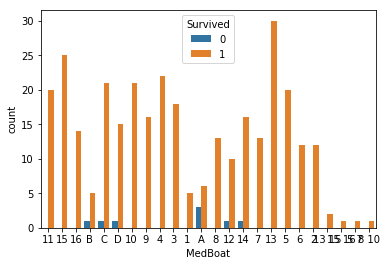

In [64]:
import seaborn as sns

sns.countplot('MedBoat', data=data, hue='Survived')

In [65]:

data['no medboat'] = data['MedBoat'].isnull()
data.head()

,traveller_ID,ticket_class,name,sex,age,Siblings_spouses,Parchil,TickNum,fare,cabin,embarked,MedBoat,Survived,no medboat
0,1214,3,"Smiljanic, Mr. Mile",male,NaN,0,0,315037,8.6625,NaN,S,NaN,0,True
1,677,3,"Bostandyeff, Mr. Guentcho",male,26.0,0,0,349224,7.8958,NaN,S,NaN,0,True
2,534,2,"Phillips, Miss. Kate Florence (""Mrs Kate Louis...",female,19.0,0,0,250655,26.0000,NaN,S,11,1,False
3,1174,3,"Sage, Miss. Dorothy Edith ""Dolly""",female,NaN,8,2,CA. 2343,69.5500,NaN,S,NaN,0,True
4,864,3,"Henriksson, Miss. Jenny Lovisa",female,28.0,0,0,347086,7.7750,NaN,S,NaN,0,True


In [66]:
data.columns.values

array(['traveller_ID', 'ticket_class', 'name', 'sex', 'age',
       'Siblings_spouses', 'Parchil', 'TickNum', 'fare', 'cabin',
       'embarked', 'MedBoat', 'Survived', 'no medboat'], dtype=object)

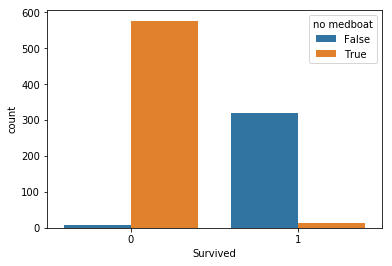

In [67]:
sns.countplot(data['Survived'],data=data, hue='no medboat')

In [68]:
co = data.corr()
co

,traveller_ID,ticket_class,age,Siblings_spouses,Parchil,fare,Survived,no medboat
traveller_ID,1.000000,0.899047,-0.338737,0.070936,0.032266,-0.477824,-0.303913,0.312347
ticket_class,0.899047,1.000000,-0.384467,0.061178,0.038908,-0.555562,-0.316505,0.327582
age,-0.338737,-0.384467,1.000000,-0.246946,-0.174866,0.137666,-0.014920,0.010206
Siblings_spouses,0.070936,0.061178,-0.246946,1.000000,0.367258,0.158024,-0.013675,0.019701
Parchil,0.032266,0.038908,-0.174866,0.367258,1.000000,0.214890,0.071425,-0.070458
fare,-0.477824,-0.555562,0.137666,0.158024,0.214890,1.000000,0.261934,-0.268871
Survived,-0.303913,-0.316505,-0.014920,-0.013675,0.071425,0.261934,1.000000,-0.952613
no medboat,0.312347,0.327582,0.010206,0.019701,-0.070458,-0.268871,-0.952613,1.000000


In [69]:
drop_col = ['fare','cabin','traveller_ID','TickNum','name','MedBoat']
data.drop(drop_col, axis=1, inplace=True)
data.head()

,ticket_class,sex,age,Siblings_spouses,Parchil,embarked,Survived,no medboat
0,3,male,NaN,0,0,S,0,True
1,3,male,26.0,0,0,S,0,True
2,2,female,19.0,0,0,S,1,False
3,3,female,NaN,8,2,S,0,True
4,3,female,28.0,0,0,S,0,True


In [70]:
data.sample(3)

,ticket_class,sex,age,Siblings_spouses,Parchil,embarked,Survived,no medboat
871,2,female,48.0,0,2,S,1,False
165,1,female,19.0,0,0,S,1,False
84,3,male,33.0,0,0,C,0,True


In [71]:
data['age'].head(7)

0     NaN
1    26.0
2    19.0
3     NaN
4    28.0
5     1.0
6     NaN
Name: age, dtype: float64

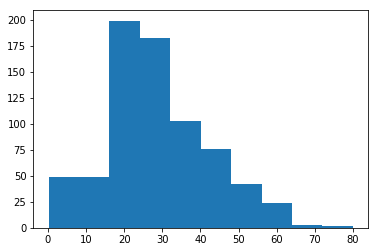

In [72]:
var = np.array(data['age'].dropna())
plt.hist(var);

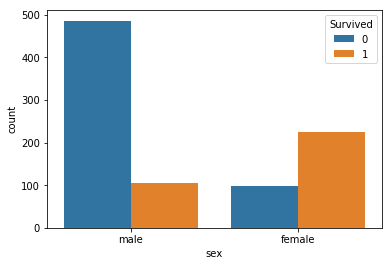

In [73]:
import seaborn as sns

sns.countplot(x=data['sex'], hue = data['Survived'], data = data)

In [74]:
print(f"{data[data['sex'] == 'male'].dropna().mean()['age']}, \n {data['age'].dropna().mean()} \n \
      {data[data['sex'] == 'female'].dropna().mean()['age']}")

29.74783528138528, 
 29.102309053497944 
       27.857456390977443


In [75]:
data['age'] = data['age'].fillna(data[data['sex']=='female']['age'].mean())

In [76]:
data['age'].head(6)

0    27.985331
1    26.000000
2    19.000000
3    27.985331
4    28.000000
5     1.000000
Name: age, dtype: float64

In [77]:
data.isnull().sum()

ticket_class        0
sex                 0
age                 0
Siblings_spouses    0
Parchil             0
embarked            1
Survived            0
no medboat          0
dtype: int64

In [78]:
data['embarked'].mode()

0    S
dtype: object

In [79]:
data['embarked'] = data['embarked'].fillna(data['embarked'].mode())

In [80]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 916 entries, 0 to 915
Data columns (total 8 columns):
ticket_class        916 non-null int64
sex                 916 non-null object
age                 916 non-null float64
Siblings_spouses    916 non-null int64
Parchil             916 non-null int64
embarked            915 non-null object
Survived            916 non-null int64
no medboat          916 non-null bool
dtypes: bool(1), float64(1), int64(4), object(2)
memory usage: 51.1+ KB


In [81]:
#pd.get_dummies(data['sex'])

In [82]:
#pd.get_dummies(data[['sex', 'embarked']])

In [83]:
data_dummy = pd.get_dummies(data[['sex','embarked']])                       

In [84]:
data_dummy.head(6)

,sex_female,sex_male,embarked_C,embarked_Q,embarked_S
0,0,1,0,0,1
1,0,1,0,0,1
2,1,0,0,0,1
3,1,0,0,0,1
4,1,0,0,0,1
5,1,0,0,0,1


In [85]:
data=pd.concat([data, data_dummy], axis=1)

In [86]:
data.head(6)

,ticket_class,sex,age,Siblings_spouses,Parchil,embarked,Survived,no medboat,sex_female,sex_male,embarked_C,embarked_Q,embarked_S
0,3,male,27.985331,0,0,S,0,True,0,1,0,0,1
1,3,male,26.000000,0,0,S,0,True,0,1,0,0,1
2,2,female,19.000000,0,0,S,1,False,1,0,0,0,1
3,3,female,27.985331,8,2,S,0,True,1,0,0,0,1
4,3,female,28.000000,0,0,S,0,True,1,0,0,0,1
5,3,female,1.000000,1,1,S,1,False,1,0,0,0,1


In [87]:
#data.loc[data['sex']=='female','sex'] = 1
#data.loc[data['sex']=='male','sex'] = 0

In [88]:
listd = ['embarked']
data = data.drop(listd,axis=1)

In [89]:
#check for inbalancing. check ratio of people that survive to those who dont. if 1:n ur data not balance, oversampling or undersampling to correct.
data.head(4)

,ticket_class,sex,age,Siblings_spouses,Parchil,Survived,no medboat,sex_female,sex_male,embarked_C,embarked_Q,embarked_S
0,3,male,27.985331,0,0,0,True,0,1,0,0,1
1,3,male,26.000000,0,0,0,True,0,1,0,0,1
2,2,female,19.000000,0,0,1,False,1,0,0,0,1
3,3,female,27.985331,8,2,0,True,1,0,0,0,1


In [90]:
y = data['Survived']
x = data.drop(['sex','Survived'], axis=1)

In [91]:
SC = StandardScaler()
col = x.columns
x = pd.DataFrame(SC.fit_transform(x), columns = col)


In [92]:
x.head(7)

,ticket_class,age,Siblings_spouses,Parchil,no medboat,sex_female,sex_male,embarked_C,embarked_Q,embarked_S
0,0.825248,-0.071860,-0.498616,-0.432553,0.745103,-0.739795,0.739795,-0.506474,-0.330089,0.660104
1,0.825248,-0.232350,-0.498616,-0.432553,0.745103,-0.739795,0.739795,-0.506474,-0.330089,0.660104
2,-0.363317,-0.798213,-0.498616,-0.432553,-1.342097,1.351725,-1.351725,-0.506474,-0.330089,0.660104
3,0.825248,-0.071860,6.897852,1.805972,0.745103,1.351725,-1.351725,-0.506474,-0.330089,0.660104
4,0.825248,-0.070675,-0.498616,-0.432553,0.745103,1.351725,-1.351725,-0.506474,-0.330089,0.660104
5,0.825248,-2.253288,0.425943,0.686709,-1.342097,1.351725,-1.351725,-0.506474,-0.330089,0.660104
6,0.825248,-0.071860,-0.498616,-0.432553,0.745103,-0.739795,0.739795,-0.506474,-0.330089,0.660104


In [93]:
from sklearn.model_selection import train_test_split
x_train,x_test, y_train,y_test = train_test_split(x, y, test_size=0.25, random_state=42)

In [94]:
#random state, use a uniform random state
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=0, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)
classifier.fit(x_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=0, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [95]:
y_pred = classifier.predict(x_test)

In [96]:
y_pred

array([0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0,
       1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1,
       1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1,
       1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0,
       0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       1, 1, 0, 0, 0, 1, 1, 1, 0], dtype=int64)

In [97]:
from sklearn import metrics

print("Accuracy: ", metrics.accuracy_score(y_test,y_pred))
print("precision: ", metrics.precision_score(y_test,y_pred))
print("f1 score: ", metrics.f1_score(y_test, y_pred))
print("recall_score: ", metrics.recall_score(y_test, y_pred))

Accuracy:  0.9868995633187773
precision:  0.9861111111111112
f1 score:  0.9793103448275863
recall_score:  0.9726027397260274


In [98]:
cm_log = confusion_matrix(y_test,y_pred)
cm_log

array([[155,   1],
       [  2,  71]], dtype=int64)

In [99]:
cr = classification_report(y_pred,y_test)

In [100]:
print(cr)

             precision    recall  f1-score   support

          0       0.99      0.99      0.99       157
          1       0.97      0.99      0.98        72

avg / total       0.99      0.99      0.99       229



In [101]:
## Using the RandomForest Classifier model
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier(random_state=1, max_depth=10,n_estimators=50) 


In [102]:
model.fit(x_train, y_train) 

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=10, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=50, n_jobs=1,
            oob_score=False, random_state=1, verbose=0, warm_start=False)

In [103]:
y_pred1 = model.predict(x_test)

In [104]:
y_pred1

array([0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0,
       1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1,
       1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0,
       0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1,
       1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0,
       0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       1, 1, 0, 0, 0, 1, 1, 1, 0], dtype=int64)

In [105]:
cm_log = confusion_matrix(y_test,y_pred1)
cm_log

array([[154,   2],
       [  3,  70]], dtype=int64)

In [106]:
cr = classification_report(y_pred1,y_test)
print(cr)

             precision    recall  f1-score   support

          0       0.99      0.98      0.98       157
          1       0.96      0.97      0.97        72

avg / total       0.98      0.98      0.98       229



In [107]:
print("Accuracy: ", metrics.accuracy_score(y_test,y_pred1))
print("precision: ", metrics.precision_score(y_test,y_pred1))
print("f1 score: ", metrics.f1_score(y_test, y_pred1))
print("recall_score: ", metrics.recall_score(y_test, y_pred1))

Accuracy:  0.9781659388646288
precision:  0.9722222222222222
f1 score:  0.9655172413793104
recall_score:  0.958904109589041


In [108]:
print("Accuracy: ", metrics.accuracy_score(y_test,y_pred2))
print("precision: ", metrics.precision_score(y_test,y_pred2))
print("f1 score: ", metrics.f1_score(y_test, y_pred2))
print("recall_score: ", metrics.recall_score(y_test, y_pred2))

NameError: name 'y_pred2' is not defined

In [109]:
from sklearn import tree

In [110]:
model3 = tree.DecisionTreeClassifier(random_state = 1)
model3.fit(x_train,y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=1,
            splitter='best')

In [111]:
y_pred3 = model3.predict(x_test)

In [112]:
y_pred3

array([0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1,
       1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0,
       0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1,
       1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0,
       0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       1, 1, 0, 0, 0, 1, 1, 0, 0], dtype=int64)

In [113]:
cm_log = confusion_matrix(y_test,y_pred3)
cm_log

array([[154,   2],
       [  7,  66]], dtype=int64)

In [114]:
cr = classification_report(y_pred3,y_test)
print(cr)

             precision    recall  f1-score   support

          0       0.99      0.96      0.97       161
          1       0.90      0.97      0.94        68

avg / total       0.96      0.96      0.96       229



In [115]:
print("Accuracy: ", metrics.accuracy_score(y_test,y_pred3))
print("precision: ", metrics.precision_score(y_test,y_pred3))
print("f1 score: ", metrics.f1_score(y_test, y_pred3))
print("recall_score: ", metrics.recall_score(y_test, y_pred3))

Accuracy:  0.9606986899563319
precision:  0.9705882352941176
f1 score:  0.9361702127659575
recall_score:  0.9041095890410958


In [116]:
from sklearn.neighbors import KNeighborsClassifier
model4 = KNeighborsClassifier(n_neighbors=5)

In [117]:
model4.fit(x_train,y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=5, p=2,
           weights='uniform')

In [118]:
y_pred4 = model4.predict(x_test)

In [119]:
y_pred4

array([0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0,
       1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1,
       1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0,
       0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1,
       1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0,
       0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       1, 1, 0, 0, 0, 1, 1, 1, 0], dtype=int64)

In [120]:
cm_log = confusion_matrix(y_test,y_pred4)
cm_log

array([[153,   3],
       [  4,  69]], dtype=int64)

In [121]:
cr = classification_report(y_pred4,y_test)
print(cr)

             precision    recall  f1-score   support

          0       0.98      0.97      0.98       157
          1       0.95      0.96      0.95        72

avg / total       0.97      0.97      0.97       229



In [122]:
from sklearn import svm

#Create a svm Classifier
clf = svm.SVC(kernel='linear', C=1.0, random_state = 1) # Linear Kernel

#Train the model using the training sets
clf.fit(x_train, y_train)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='linear',
  max_iter=-1, probability=False, random_state=1, shrinking=True,
  tol=0.001, verbose=False)

In [123]:
y_pred5 = clf.predict(x_test)

In [124]:
y_pred5

array([0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0,
       1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1,
       1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1,
       1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0,
       0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       1, 1, 0, 0, 0, 1, 1, 1, 0], dtype=int64)

In [125]:
cm_log = confusion_matrix(y_test,y_pred5)
cm_log

array([[155,   1],
       [  2,  71]], dtype=int64)

In [126]:
cr = classification_report(y_pred5,y_test)
print(cr)

             precision    recall  f1-score   support

          0       0.99      0.99      0.99       157
          1       0.97      0.99      0.98        72

avg / total       0.99      0.99      0.99       229



In [127]:
print("Accuracy: ", metrics.accuracy_score(y_test,y_pred5))
print("precision: ", metrics.precision_score(y_test,y_pred5))
print("f1 score: ", metrics.f1_score(y_test, y_pred5))
print("recall_score: ", metrics.recall_score(y_test, y_pred5))

Accuracy:  0.9868995633187773
precision:  0.9861111111111112
f1 score:  0.9793103448275863
recall_score:  0.9726027397260274


# TO check for feature importances on random forest classifier

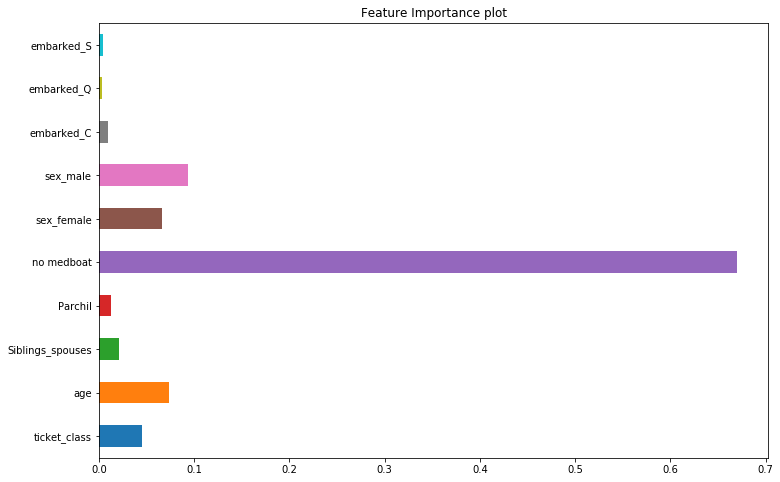

In [184]:
importances = pd.Series(model.feature_importances_, index=x_train.columns)
importances.plot(kind='barh', figsize=(12,8), use_index=True, title="Feature Importance plot");

## often for interpretable/comprehensible models like decision trees, random forest, logistic regression, we can have a glimpse of the important features that improve the models.

## A lot has to do with feature engineering as seen from the above feature importance plot.




## hyperparameter tuning gave less improvement as compared to the addition of the 'no medboat' feature.

In [129]:
from sklearn.naive_bayes import GaussianNB

#Create a Gaussian Classifier
model6 = GaussianNB()

# Train the model using the training sets
model6.fit(x_train,y_train)


GaussianNB(priors=None)

In [130]:
y_pred6 = model6.predict(x_test)

In [131]:
y_pred6

array([0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0,
       1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1,
       1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1,
       1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0,
       0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       1, 1, 0, 0, 0, 1, 1, 1, 0], dtype=int64)

In [132]:
cm_log = confusion_matrix(y_test,y_pred6)
cm_log

array([[155,   1],
       [  2,  71]], dtype=int64)

In [133]:
cr = classification_report(y_pred6,y_test)
print(cr)

             precision    recall  f1-score   support

          0       0.99      0.99      0.99       157
          1       0.97      0.99      0.98        72

avg / total       0.99      0.99      0.99       229



In [134]:
print("Accuracy: ", metrics.accuracy_score(y_test,y_pred6))
print("precision: ", metrics.precision_score(y_test,y_pred6))
print("f1 score: ", metrics.f1_score(y_test, y_pred6))
print("recall_score: ", metrics.recall_score(y_test, y_pred6))

Accuracy:  0.9868995633187773
precision:  0.9861111111111112
f1 score:  0.9793103448275863
recall_score:  0.9726027397260274


In [135]:
#TO PREDICT ON THE TEST SETS



In [136]:
test = pd.read_csv('test.csv')

In [137]:
test.head()

,traveller_ID,ticket_class,name,sex,age,Siblings_spouses,Parchil,TickNum,fare,cabin,embarked,MedBoat
0,1148,3.0,"Rintamaki, Mr. Matti",male,35.0,0.0,0.0,STON/O 2. 3101273,7.1250,NaN,S,NaN
1,1049,3.0,"Nakid, Mr. Sahid",male,20.0,1.0,1.0,2653,15.7417,NaN,C,C
2,982,3.0,"Lyntakoff, Mr. Stanko",male,NaN,0.0,0.0,349235,7.8958,NaN,S,NaN
3,808,3.0,"Ford, Mr. Arthur",male,NaN,0.0,0.0,A/5 1478,8.0500,NaN,S,NaN
4,1195,3.0,"Shaughnessy, Mr. Patrick",male,NaN,0.0,0.0,370374,7.7500,NaN,Q,NaN


In [138]:
test.isnull().sum().sort_values(ascending=False)

cabin               302
MedBoat             234
age                  76
embarked              1
fare                  0
TickNum               0
Parchil               0
Siblings_spouses      0
sex                   0
name                  0
ticket_class          0
traveller_ID          0
dtype: int64

In [139]:
test.describe()

,traveller_ID,ticket_class,age,Siblings_spouses,Parchil,fare
count,393.000000,393.000000,317.000000,393.000000,393.000000,393.000000
mean,648.758270,2.269720,31.672187,0.404580,0.381679,32.332188
std,370.986997,0.829017,15.472486,0.934967,0.796594,49.199401
min,10.000000,1.000000,0.416700,0.000000,0.000000,0.000000
25%,327.000000,2.000000,22.000000,0.000000,0.000000,7.895800
50%,618.000000,3.000000,30.000000,0.000000,0.000000,13.000000
75%,986.000000,3.000000,40.500000,1.000000,0.000000,31.275000
max,1301.000000,3.000000,74.000000,8.000000,6.000000,512.329200


In [140]:
test['no medboat'] = test['MedBoat'].isnull()
test.head()

,traveller_ID,ticket_class,name,sex,age,Siblings_spouses,Parchil,TickNum,fare,cabin,embarked,MedBoat,no medboat
0,1148,3.0,"Rintamaki, Mr. Matti",male,35.0,0.0,0.0,STON/O 2. 3101273,7.1250,NaN,S,NaN,True
1,1049,3.0,"Nakid, Mr. Sahid",male,20.0,1.0,1.0,2653,15.7417,NaN,C,C,False
2,982,3.0,"Lyntakoff, Mr. Stanko",male,NaN,0.0,0.0,349235,7.8958,NaN,S,NaN,True
3,808,3.0,"Ford, Mr. Arthur",male,NaN,0.0,0.0,A/5 1478,8.0500,NaN,S,NaN,True
4,1195,3.0,"Shaughnessy, Mr. Patrick",male,NaN,0.0,0.0,370374,7.7500,NaN,Q,NaN,True


In [141]:
drop_col1 = ['fare','cabin','traveller_ID','TickNum','name','MedBoat']
test.drop(drop_col1, axis=1, inplace=True)
test.head()

,ticket_class,sex,age,Siblings_spouses,Parchil,embarked,no medboat
0,3.0,male,35.0,0.0,0.0,S,True
1,3.0,male,20.0,1.0,1.0,C,False
2,3.0,male,NaN,0.0,0.0,S,True
3,3.0,male,NaN,0.0,0.0,S,True
4,3.0,male,NaN,0.0,0.0,Q,True


In [142]:
test['age'] = test['age'].fillna(test['age'].mean())

In [143]:
test['age'].mean()

31.67218738170349

In [144]:
test.head()

,ticket_class,sex,age,Siblings_spouses,Parchil,embarked,no medboat
0,3.0,male,35.000000,0.0,0.0,S,True
1,3.0,male,20.000000,1.0,1.0,C,False
2,3.0,male,31.672187,0.0,0.0,S,True
3,3.0,male,31.672187,0.0,0.0,S,True
4,3.0,male,31.672187,0.0,0.0,Q,True


In [145]:
test.isnull().sum()

ticket_class        0
sex                 0
age                 0
Siblings_spouses    0
Parchil             0
embarked            1
no medboat          0
dtype: int64

In [146]:
test['embarked'].mode()

0    S
dtype: object

In [147]:
import seaborn as sns

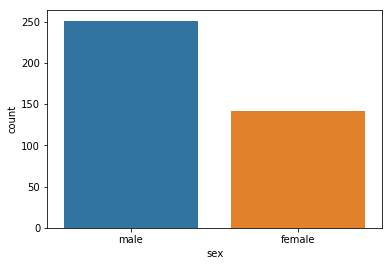

In [148]:
sns.countplot(test['sex'], data=test)

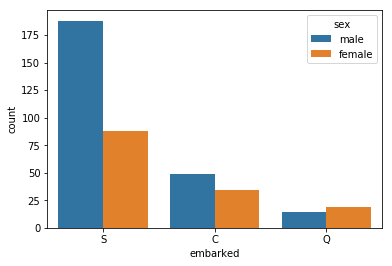

In [149]:
sns.countplot(test['embarked'],hue=test['sex'], data=test)

In [150]:
test['embarked'] = test['embarked'].fillna('S')

In [151]:
data_dummy1 = pd.get_dummies(test[['sex','embarked']])                       

In [152]:
data_dummy1.head()

,sex_female,sex_male,embarked_C,embarked_Q,embarked_S
0,0,1,0,0,1
1,0,1,1,0,0
2,0,1,0,0,1
3,0,1,0,0,1
4,0,1,0,1,0


In [153]:
test=pd.concat([test, data_dummy1], axis=1)

In [154]:
test.head()

,ticket_class,sex,age,Siblings_spouses,Parchil,embarked,no medboat,sex_female,sex_male,embarked_C,embarked_Q,embarked_S
0,3.0,male,35.000000,0.0,0.0,S,True,0,1,0,0,1
1,3.0,male,20.000000,1.0,1.0,C,False,0,1,1,0,0
2,3.0,male,31.672187,0.0,0.0,S,True,0,1,0,0,1
3,3.0,male,31.672187,0.0,0.0,S,True,0,1,0,0,1
4,3.0,male,31.672187,0.0,0.0,Q,True,0,1,0,1,0


In [155]:
listd1 = ['sex','embarked']
test = test.drop(listd1,axis=1)
col = test.columns

In [156]:
test = pd.DataFrame(SC.transform(test), columns=col)

In [157]:
test.head()

,ticket_class,age,Siblings_spouses,Parchil,no medboat,sex_female,sex_male,embarked_C,embarked_Q,embarked_S
0,0.825248,0.495188,-0.498616,-0.432553,0.745103,-0.739795,0.739795,-0.506474,-0.330089,0.660104
1,0.825248,-0.717375,0.425943,0.686709,-1.342097,-0.739795,0.739795,1.974436,-0.330089,-1.514914
2,0.825248,0.226176,-0.498616,-0.432553,0.745103,-0.739795,0.739795,-0.506474,-0.330089,0.660104
3,0.825248,0.226176,-0.498616,-0.432553,0.745103,-0.739795,0.739795,-0.506474,-0.330089,0.660104
4,0.825248,0.226176,-0.498616,-0.432553,0.745103,-0.739795,0.739795,-0.506474,3.029485,-1.514914


In [158]:
classifier


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=0, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [159]:
preder = classifier.predict(test)

In [160]:
preder

array([0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0,
       0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0,
       0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1,
       1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1,
       1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1,
       1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1,
       0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 0,
       1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0,
       1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0,
       1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1,
       1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0,

In [161]:
sample_submission = pd.read_csv("sample_submission.csv")

In [162]:
sample_submission.head()

,traveller_ID,Survived
0,1148,0
1,1049,1
2,982,0
3,808,1
4,1195,0


In [163]:
submission_file = sample_submission.copy()

In [164]:
submission_file.head(6)

,traveller_ID,Survived
0,1148,0
1,1049,1
2,982,0
3,808,1
4,1195,0
5,240,1


In [165]:
submission_file.Survived = preder

In [166]:
submission_file.Survived.head(6)

0    0
1    1
2    0
3    0
4    0
5    1
Name: Survived, dtype: int64

In [167]:
submission_file.head()

,traveller_ID,Survived
0,1148,0
1,1049,1
2,982,0
3,808,0
4,1195,0


In [168]:
submission_file.to_csv('classifier.csv', index=False)